In [3]:
%matplotlib inline

import pandas as pd; pd.set_option('display.max_columns', None)
import seaborn as sns
from matplotlib import pyplot as plt

In [17]:

df = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/yearly/2020.csv')

df.head()

,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,PassingTD,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints,Int,Fumbles,FumblesLost
0,Derrick Henry,TEN,RB,26,16,16,31,19,0,0,0,2027,17,378,114,0,314.0,0,3,2
1,Alvin Kamara,NOR,RB,25,15,10,107,83,0,0,0,932,16,187,756,5,295.0,0,1,0
2,Dalvin Cook,MIN,RB,25,14,14,54,44,0,0,0,1557,16,312,361,1,294.0,0,5,3
3,Travis Kelce,KAN,TE,31,15,15,145,105,4,0,2,0,0,0,1416,11,208.0,0,1,1
4,Davante Adams,GNB,WR,28,14,14,149,115,0,0,0,0,0,0,1374,18,243.0,0,1,1


In [18]:
clean_df=df.drop('FantasyPoints', axis=1)
clean_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Player        626 non-null    object
 1   Tm            626 non-null    object
 2   Pos           578 non-null    object
 3   Age           626 non-null    int64 
 4   G             626 non-null    int64 
 5   GS            626 non-null    int64 
 6   Tgt           626 non-null    int64 
 7   Rec           626 non-null    int64 
 8   PassingYds    626 non-null    int64 
 9   PassingTD     626 non-null    int64 
 10  PassingAtt    626 non-null    int64 
 11  RushingYds    626 non-null    int64 
 12  RushingTD     626 non-null    int64 
 13  RushingAtt    626 non-null    int64 
 14  ReceivingYds  626 non-null    int64 
 15  ReceivingTD   626 non-null    int64 
 16  Int           626 non-null    int64 
 17  Fumbles       626 non-null    int64 
 18  FumblesLost   626 non-null    int64 
dtypes: int64

In [25]:
def get_usage(row):
    games = row['G']
    if row['Pos'] == 'RB' or row['Pos'] == 'WR' or row['Pos'] == 'TE':
        return (row['Tgt'] + row['RushingAtt'])/games
    else:
        return (row['PassingAtt'] + row['RushingAtt'])/games

clean_df['Usage/G'] = clean_df.apply(get_usage, axis=1)

clean_df.head()

,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,PassingTD,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,Int,Fumbles,FumblesLost,Usage/G
0,Derrick Henry,TEN,RB,26,16,16,31,19,0,0,0,2027,17,378,114,0,0,3,2,25.562500
1,Alvin Kamara,NOR,RB,25,15,10,107,83,0,0,0,932,16,187,756,5,0,1,0,19.600000
2,Dalvin Cook,MIN,RB,25,14,14,54,44,0,0,0,1557,16,312,361,1,0,5,3,26.142857
3,Travis Kelce,KAN,TE,31,15,15,145,105,4,0,2,0,0,0,1416,11,0,1,1,9.666667
4,Davante Adams,GNB,WR,28,14,14,149,115,0,0,0,0,0,0,1374,18,0,1,1,10.642857


In [29]:
scoring_weights = {
    'RushingYds': 0.1,
    'ReceivingYds': 0.1,
    'ReceivingTD': 6,
    'RushingTD': 6,
    'FumblesLost': -2,
    'Rec': 0.5,
    'PassingYds': 0.04,
    'PassingTD': 4,
    'Int': -2
}

def get_fantasy(row):
    games = row['G']
    fantasy_points = sum([row[column]*weight for column, weight in scoring_weights.items()])
    return fantasy_points/games

clean_df['FantasyPoints/G'] = clean_df.apply(get_fantasy, axis = 1)

clean_df.head()

,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,PassingTD,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,Int,Fumbles,FumblesLost,Usage/G,FantasyPoints/G
0,Derrick Henry,TEN,RB,26,16,16,31,19,0,0,0,2027,17,378,114,0,0,3,2,25.562500,20.100000
1,Alvin Kamara,NOR,RB,25,15,10,107,83,0,0,0,932,16,187,756,5,0,1,0,19.600000,22.420000
2,Dalvin Cook,MIN,RB,25,14,14,54,44,0,0,0,1557,16,312,361,1,0,5,3,26.142857,22.128571
3,Travis Kelce,KAN,TE,31,15,15,145,105,4,0,2,0,0,0,1416,11,0,1,1,9.666667,17.217333
4,Davante Adams,GNB,WR,28,14,14,149,115,0,0,0,0,0,0,1374,18,0,1,1,10.642857,21.492857


clean_df now represents are cleaned data for QB, WR, RB, and TE including usage/game and fantasy points/game. I have broken clean_df up into 5 additionals df of rb only, wr only, te only, qb only, and flex.

In [43]:
rb_df = clean_df.loc[clean_df.Pos == 'RB']
wr_df = clean_df.loc[clean_df.Pos == 'WR']
te_df = clean_df.loc[clean_df.Pos == 'TE']
qb_df = clean_df.loc[clean_df.Pos == 'QB']
flex_df = clean_df.loc[clean_df.Pos != 'QB']

flex_df.head()

,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,PassingTD,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,Int,Fumbles,FumblesLost,Usage/G,FantasyPoints/G
0,Derrick Henry,TEN,RB,26,16,16,31,19,0,0,0,2027,17,378,114,0,0,3,2,25.562500,20.100000
1,Alvin Kamara,NOR,RB,25,15,10,107,83,0,0,0,932,16,187,756,5,0,1,0,19.600000,22.420000
2,Dalvin Cook,MIN,RB,25,14,14,54,44,0,0,0,1557,16,312,361,1,0,5,3,26.142857,22.128571
3,Travis Kelce,KAN,TE,31,15,15,145,105,4,0,2,0,0,0,1416,11,0,1,1,9.666667,17.217333
4,Davante Adams,GNB,WR,28,14,14,149,115,0,0,0,0,0,0,1374,18,0,1,1,10.642857,21.492857


<Figure size 576x576 with 0 Axes>

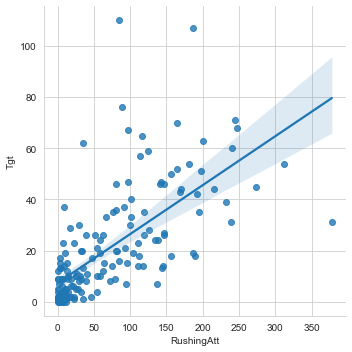

In [44]:
sns.set_style('whitegrid')
plt.figure(figsize=(8, 8))

sns.lmplot(data = rb_df, x = 'RushingAtt', y = 'Tgt')

Text(0.5, 1.0, 'Rushing Attempts vs. Targets for RBs 2020')

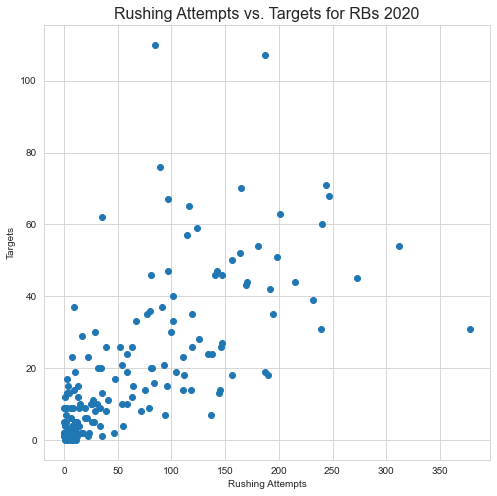

In [45]:
plt.figure(figsize=(8,8))
plt.scatter(data=rb_df, x='RushingAtt', y='Tgt')
plt.xlabel('Rushing Attempts')
plt.ylabel('Targets')
plt.title('Rushing Attempts vs. Targets for RBs 2020', fontsize=16)

<AxesSubplot:xlabel='Usage/G', ylabel='FantasyPoints/G'>

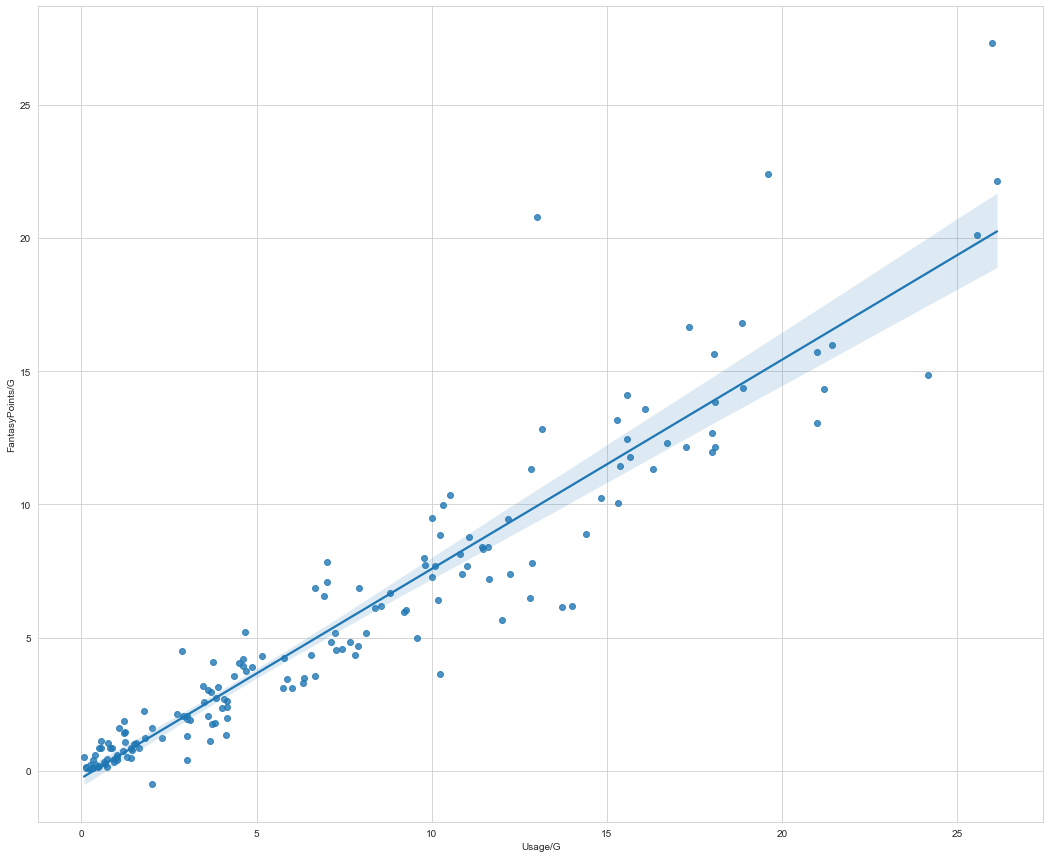

In [46]:
plt.figure(figsize=(18,15))
sns.regplot(data=rb_df, x='Usage/G', y='FantasyPoints/G')